In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json


In [2]:
data = pd.read_csv('safer-parks-accident-dataset.csv', encoding='cp1252')
data.head()

,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,gender,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes,year
0,1007272,2009-04-05,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,cars & track rides,Track ride,...,F,Patron's attorney stated that she had a right ...,Right vertegral artery tear,0,Illness or neurological symptoms,False,False,False,0,2009
1,918972,2009-02-05,FL,Naples,P,Florida Dept. of Agriculture,Carnival or rental,amusement ride,pendulum,Flying carpet ride,...,F,17-yo female was ejected from the ride mid-cyl...,Multiple broken ribs and bruised lung,https://saferparksdata.org/sites/default/files...,Fall: ejection/fall from ride,True,False,False,"This was the third ejection on this ride, unde...",2009
2,919123,2008-11-08,CA,Buena Park,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,M,Guest injured right hand while riding.,Injured hand. Treated at local hospital.,0,Unknown (not enough info),False,False,False,0,2008
3,919095,2008-11-01,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,"Guest stated when she sat down in the vehicle,...",Nosebleed. Treated at local hospital.,0,Illness or neurological symptoms,False,False,False,0,2008
4,919094,2008-10-29,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,Guest stated she felt lightheaded and experien...,"Dizziness, high blood pressure. Treated at lo...",0,Illness or neurological symptoms,False,False,False,0,2008


In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,gender,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes,year
0,1007272,2009-04-05,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,cars & track rides,Track ride,...,F,Patron's attorney stated that she had a right ...,Right vertegral artery tear,0,Illness or neurological symptoms,False,False,False,0,2009
1,918972,2009-02-05,FL,Naples,P,Florida Dept. of Agriculture,Carnival or rental,amusement ride,pendulum,Flying carpet ride,...,F,17-yo female was ejected from the ride mid-cyl...,Multiple broken ribs and bruised lung,https://saferparksdata.org/sites/default/files...,Fall: ejection/fall from ride,True,False,False,"This was the third ejection on this ride, unde...",2009
2,919123,2008-11-08,CA,Buena Park,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,M,Guest injured right hand while riding.,Injured hand. Treated at local hospital.,0,Unknown (not enough info),False,False,False,0,2008
3,919095,2008-11-01,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,"Guest stated when she sat down in the vehicle,...",Nosebleed. Treated at local hospital.,0,Illness or neurological symptoms,False,False,False,0,2008
4,919094,2008-10-29,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,Guest stated she felt lightheaded and experien...,"Dizziness, high blood pressure. Treated at lo...",0,Illness or neurological symptoms,False,False,False,0,2008


In [5]:
#Make an address
df['Address'] = df.acc_city + ', ' + df.acc_state
df.head()

,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes,year,Address
0,1007272,2009-04-05,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,cars & track rides,Track ride,...,Patron's attorney stated that she had a right ...,Right vertegral artery tear,0,Illness or neurological symptoms,False,False,False,0,2009,"Anaheim, CA"
1,918972,2009-02-05,FL,Naples,P,Florida Dept. of Agriculture,Carnival or rental,amusement ride,pendulum,Flying carpet ride,...,17-yo female was ejected from the ride mid-cyl...,Multiple broken ribs and bruised lung,https://saferparksdata.org/sites/default/files...,Fall: ejection/fall from ride,True,False,False,"This was the third ejection on this ride, unde...",2009,"Naples, FL"
2,919123,2008-11-08,CA,Buena Park,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,Guest injured right hand while riding.,Injured hand. Treated at local hospital.,0,Unknown (not enough info),False,False,False,0,2008,"Buena Park, CA"
3,919095,2008-11-01,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,"Guest stated when she sat down in the vehicle,...",Nosebleed. Treated at local hospital.,0,Illness or neurological symptoms,False,False,False,0,2008,"Anaheim, CA"
4,919094,2008-10-29,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,Guest stated she felt lightheaded and experien...,"Dizziness, high blood pressure. Treated at lo...",0,Illness or neurological symptoms,False,False,False,0,2008,"Anaheim, CA"


In [6]:
df['year'].value_counts()

2001    2217
2002    1864
2000    1818
2005    1409
2003    1325
2004    1255
2006    1202
1999    1015
2007     934
1997     318
1998     263
1995     226
1996     224
2008     204
1994     194
1993     134
1992      92
1990      84
1989      40
1988      31
1991      31
2009       2
1987       1
1986       1
Name: year, dtype: int64

In [7]:
df2 = df.loc[df['acc_city'] != '0']
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7967 entries, 0 to 14882
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_id                7967 non-null   int64  
 1   acc_date              7967 non-null   object 
 2   acc_state             7967 non-null   object 
 3   acc_city              7967 non-null   object 
 4   fix_port              7967 non-null   object 
 5   source                7967 non-null   object 
 6   bus_type              7967 non-null   object 
 7   industry_sector       7967 non-null   object 
 8   device_category       7967 non-null   object 
 9   device_type           7967 non-null   object 
 10  tradename_or_generic  7967 non-null   object 
 11  manufacturer          7967 non-null   object 
 12  num_injured           7967 non-null   int64  
 13  age_youngest          7967 non-null   float64
 14  gender                7967 non-null   object 
 15  acc_desc            

In [8]:
sample_df = df2.sample(n=1000, random_state=1234)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 5137 to 3418
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_id                1000 non-null   int64  
 1   acc_date              1000 non-null   object 
 2   acc_state             1000 non-null   object 
 3   acc_city              1000 non-null   object 
 4   fix_port              1000 non-null   object 
 5   source                1000 non-null   object 
 6   bus_type              1000 non-null   object 
 7   industry_sector       1000 non-null   object 
 8   device_category       1000 non-null   object 
 9   device_type           1000 non-null   object 
 10  tradename_or_generic  1000 non-null   object 
 11  manufacturer          1000 non-null   object 
 12  num_injured           1000 non-null   int64  
 13  age_youngest          1000 non-null   float64
 14  gender                1000 non-null   object 
 15  acc_desc          

In [9]:
sample_df.head(25)

,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes,year,Address
5137,919718,2003-09-20,CA,Roseville,F,California Division of Occupational Safety and...,Water park,water park,float attraction,Lazy river,...,Unknown,Unknown,0,Unknown (not enough info),False,False,False,0,2003,"Roseville, CA"
2802,914728,2005-08-06,NJ,Jackson,F,New Jersey Dept. of Community Affairs,Amusement park,amusement ride,water ride,Shoot the chute,...,Boat would not engage lift. Boat was taking on...,0,0,Equipment failure,True,False,False,Product failure,2005,"Jackson, NJ"
2406,918393,2005-11-10,CA,Carlsbad,F,California Division of Occupational Safety and...,Amusement park,amusement ride,cars & track rides,Car ride,...,Guest was on ride with grandparents and sister...,cut to chin,0,Impact: hit something within ride vehicle,False,False,False,0,2005,"Carlsbad, CA"
8171,917292,2002-02-14,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,Alleges she injured her neck after riding the ...,injured neck,0,Body pain (normal motion),False,False,False,0,2002,"Anaheim, CA"
4602,918749,2004-06-24,CA,Los Angeles,F,California Division of Occupational Safety and...,Amusement park,amusement ride,water ride,Flume ride,...,Guest with a history of high blood pressure an...,seizure,0,Illness: Seizure or LOC,False,False,False,0,2004,"Los Angeles, CA"
4587,917556,2004-06-26,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,Patron was transported for cardiac arrest afte...,Cardiac arrest,0,Illness or neurological symptoms,False,False,False,0,2004,"Anaheim, CA"
7636,919438,2002-06-20,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,Guest states she injured her back while riding.,Injury to back. Treated at local hospital (pa...,0,Body pain (normal motion),False,False,False,0,2002,"Anaheim, CA"
7371,910650,2002-07-05,NJ,N. Wildwood,F,New Jersey Dept. of Community Affairs,Amusement park,recreation,go-kart,Go-kart,...,Guest states while riding as passenger in 2 pe...,"Pain, unknown",0,Collision: patron-controlled vehicles,False,False,False,0,2002,"N. Wildwood, NJ"
5243,910181,2003-08-23,NJ,Mt. Laurel,F,New Jersey Dept. of Community Affairs,Family entertainment center,recreation,go-kart,Go-kart,...,"Patron was riding on the Grand Prix track, at ...",0,0,Collision: go-kart or bumper car hit stationar...,False,False,False,Investigated by State Officials,2003,"Mt. Laurel, NJ"
14459,897709,1994-03-03,FL,Panama City Bch.,F,Florida Dept. of Agriculture,Other,amusement ride,pendulum,Reverse bungee,...,Killed while setting up.,Death,0,Unknown (not enough info),False,False,False,0,1994,"Panama City Bch., FL"


In [10]:
df2 = df.loc[df['year'] >= 2000]
df2['year'].value_counts()

2001    2217
2002    1864
2000    1818
2005    1409
2003    1325
2004    1255
2006    1202
2007     934
2008     204
2009       2
Name: year, dtype: int64

In [11]:
sample_df = df2.sample(n=1000, random_state=1)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1986 to 1463
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_id                1000 non-null   int64  
 1   acc_date              1000 non-null   object 
 2   acc_state             1000 non-null   object 
 3   acc_city              1000 non-null   object 
 4   fix_port              1000 non-null   object 
 5   source                1000 non-null   object 
 6   bus_type              1000 non-null   object 
 7   industry_sector       1000 non-null   object 
 8   device_category       1000 non-null   object 
 9   device_type           1000 non-null   object 
 10  tradename_or_generic  1000 non-null   object 
 11  manufacturer          1000 non-null   object 
 12  num_injured           1000 non-null   int64  
 13  age_youngest          1000 non-null   float64
 14  gender                1000 non-null   object 
 15  acc_desc          

In [12]:
sample_df.to_csv('sample_df.csv')

In [13]:
sample_df.to_json("data.json", orient="columns")


In [26]:
dfgpavg=sample_df.groupby(["device_category", "year"]).sum()
cols=['num_injured']
dfgpavg=dfgpavg.loc[:,cols]
dfgpavg.reset_index(inplace=True)
dfgpavg.head(20)

,device_category,year,num_injured
0,alpine activity,2001,1
1,alpine activity,2004,2
2,aquatic play,2000,6
3,aquatic play,2001,3
4,aquatic play,2002,2
5,aquatic play,2003,6
6,aquatic play,2004,3
7,aquatic play,2005,5
8,aquatic play,2006,2
9,aquatic play,2007,3


In [27]:
dfgpavg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   device_category  124 non-null    object
 1   year             124 non-null    int64 
 2   num_injured      124 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


In [59]:
dfvar1=dfgpavg.loc[dfgpavg['year'] == 2000]
cols=['device_category', 'num_injured']
dfvar1=dfvar1.loc[:, cols]
dfvar1.rename(columns = {'device_category':'device_category','num_injured': 'year_2000'}, inplace = True)
dfvar1

dfvar2=dfgpavg.loc[dfgpavg['year'] == 2001]
cols=['device_category', 'num_injured']
dfvar2=dfvar2.loc[:, cols]
dfvar2.rename(columns = {'device_category':'device_category','num_injured': 'year_2001'}, inplace = True)
dfvar2
dfvar2=pd.merge(dfvar1,dfvar2, on="device_category", how='outer')
dfvar2

dfvar3=dfgpavg.loc[dfgpavg['year'] == 2002]
cols=['device_category', 'num_injured']
dfvar3=dfvar3.loc[:, cols]
dfvar3.rename(columns = {'device_category':'device_category','num_injured': 'year_2002'}, inplace = True)
dfvar3=pd.merge(dfvar2,dfvar3, on="device_category", how='outer')
dfvar3

dfvar4=dfgpavg.loc[dfgpavg['year'] == 2003]
cols=['device_category', 'num_injured']
dfvar4=dfvar4.loc[:, cols]
dfvar4.rename(columns = {'device_category':'device_category','num_injured': 'year_2003'}, inplace = True)
dfvar4=pd.merge(dfvar3,dfvar4, on="device_category", how='outer')
dfvar4

dfvar5=dfgpavg.loc[dfgpavg['year'] == 2004]
cols=['device_category', 'num_injured']
dfvar5=dfvar5.loc[:, cols]
dfvar5.rename(columns = {'device_category':'device_category','num_injured': 'year_2004'}, inplace = True)
dfvar5=pd.merge(dfvar4,dfvar5, on="device_category", how='outer')
dfvar5

dfvar6=dfgpavg.loc[dfgpavg['year'] == 2005]
cols=['device_category', 'num_injured']
dfvar6=dfvar6.loc[:, cols]
dfvar6.rename(columns = {'device_category':'device_category','num_injured': 'year_2005'}, inplace = True)
dfvar6=pd.merge(dfvar5,dfvar6, on="device_category", how='outer')
dfvar6

dfvar7=dfgpavg.loc[dfgpavg['year'] == 2006]
cols=['device_category', 'num_injured']
dfvar7=dfvar7.loc[:, cols]
dfvar7.rename(columns = {'device_category':'device_category','num_injured': 'year_2006'}, inplace = True)
dfvar7=pd.merge(dfvar6,dfvar7, on="device_category", how='outer')
dfvar7

dfvar8=dfgpavg.loc[dfgpavg['year'] == 2007]
cols=['device_category', 'num_injured']
dfvar8=dfvar8.loc[:, cols]
dfvar8.rename(columns = {'device_category':'device_category','num_injured': 'year_2007'}, inplace = True)
dfvar8=pd.merge(dfvar7,dfvar8, on="device_category", how='outer')
dfvar8

dfvar9=dfgpavg.loc[dfgpavg['year'] == 2008]
cols=['device_category', 'num_injured']
dfvar9=dfvar9.loc[:, cols]
dfvar9.rename(columns = {'device_category':'device_category','num_injured': 'year_2008'}, inplace = True)
dfvar9=pd.merge(dfvar8,dfvar9, on="device_category", how='outer')
dfvar9



,device_category,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008
0,aquatic play,6.0,3.0,2.0,6.0,3.0,5.0,2.0,3.0,1.0
1,cars & track rides,11.0,24.0,11.0,5.0,6.0,10.0,5.0,4.0,2.0
2,coaster,25.0,35.0,29.0,14.0,35.0,20.0,16.0,8.0,NaN
3,float attraction,4.0,2.0,2.0,2.0,5.0,2.0,2.0,NaN,NaN
4,go-kart,17.0,27.0,13.0,12.0,10.0,6.0,11.0,6.0,NaN
5,inflatable,2.0,1.0,2.0,NaN,NaN,2.0,3.0,4.0,NaN
6,other attraction,11.0,8.0,1.0,9.0,2.0,5.0,1.0,2.0,1.0
7,pendulum,6.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,NaN
8,play equipment,5.0,5.0,7.0,1.0,2.0,NaN,1.0,NaN,NaN
9,spinning,21.0,27.0,30.0,7.0,18.0,16.0,16.0,14.0,4.0


In [60]:
dfvar9.to_json("data_group_num_injured.json", orient="columns")

In [61]:
dfvar9.to_csv('dfvar9.csv')

In [62]:
dfgp_count=sample_df.groupby(["year", "device_category"])["num_injured"].sum()
dfgp_count.head(50)

year  device_category   
2000  aquatic play           6
      cars & track rides    11
      coaster               25
      float attraction       4
      go-kart               17
      inflatable             2
      other attraction      11
      pendulum               6
      play equipment         5
      spinning              21
      unknown                1
      vertical drop          1
      water ride            12
      water slide           28
2001  alpine activity        1
      aquatic play           3
      cars & track rides    24
      challenge activity     2
      coaster               35
      float attraction       2
      go-kart               27
      inflatable             1
      other attraction       8
      pendulum               1
      play equipment         5
      spinning              27
      vertical drop          5
      water ride            12
      water slide           38
      wave device            3
2002  aquatic play           2
      cars & t

In [63]:
dfgp_count.info()

<class 'pandas.core.series.Series'>
MultiIndex: 124 entries, (2000, 'aquatic play') to (2008, 'wave device')
Series name: num_injured
Non-Null Count  Dtype
--------------  -----
124 non-null    int64
dtypes: int64(1)
memory usage: 1.5+ KB


In [18]:
dfgp_count.to_json("data_group_num_injured.json", orient="columns")

In [82]:
dfgp3.to_csv('dfgp4.csv')

In [51]:
total_injured=sample_df.groupby(["year"])["num_injured"].sum()
total_injured


year
2000    150
2001    194
2002    160
2003    207
2004    118
2005    104
2006     84
2007     79
2008     12
Name: num_injured, dtype: int64

In [84]:
data2 = pd.read_csv('dfgp4.csv', encoding='cp1252')
data2.head()

,year,device_category,num_injured,perc_injured
0,2000,aquatic play,6,0.040000
1,2000,cars & track rides,11,0.073333
2,2000,coaster,25,0.166667
3,2000,float attraction,4,0.026667
4,2000,go-kart,17,0.113333


In [85]:
data2.to_json("data2.json", orient="records")

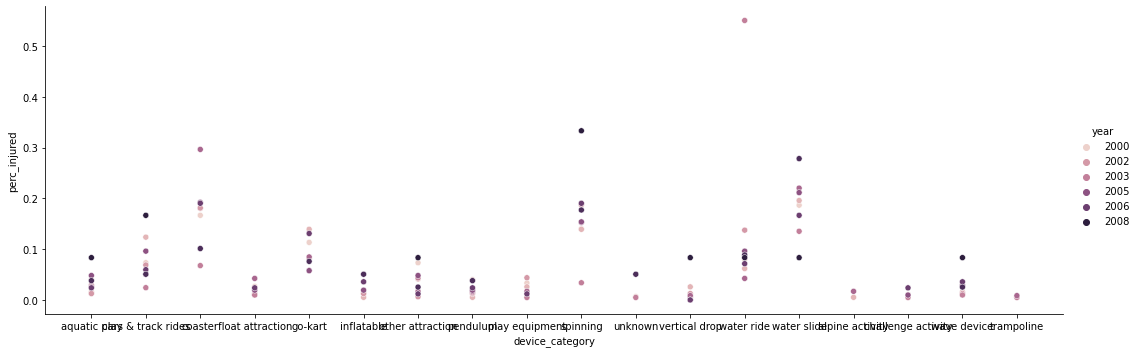

In [94]:
sns.relplot(data=data2, x="device_category", y="perc_injured", hue="year", aspect=3)

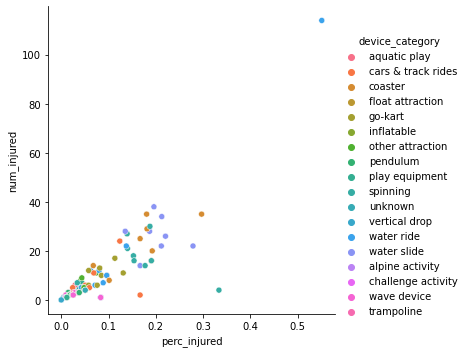

In [89]:
sns.relplot(data=data2, x="perc_injured", y="num_injured", hue="device_category")

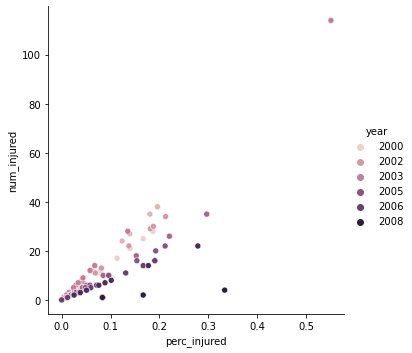

In [90]:
sns.relplot(data=data2, x="perc_injured", y="num_injured", hue="year")